<a href="https://colab.research.google.com/github/VaidehiBisen14/DEEPLEARNINGVaidehi/blob/main/DL_Pr_no_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = load_diabetes()
X = data.data
y = data.target

In [3]:
X = X[:, 2].reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [6]:
alpha = 0.1
iters = 1000
theta = np.zeros((X_train.shape[1], 1))

In [7]:
for i in range(iters):
    gradients = X_train.T.dot(X_train.dot(theta) - y_train.reshape(-1, 1))
    theta = theta - (alpha / len(y_train)) * gradients

In [8]:
print(f"Gradient Descent theta: {theta}")

Gradient Descent theta: [[153.39298836]
 [199.72393333]]


In [10]:

y_pred_gd = X_test.dot(theta)

y_pred_gd = y_pred_gd.flatten()

r2_gd = r2_score(y_test, y_pred_gd)
print(f"Gradient Descent R^2: {r2_gd}")


Gradient Descent R^2: 0.10971682729994048


Normal Equation R^2: 0.23335039815872138


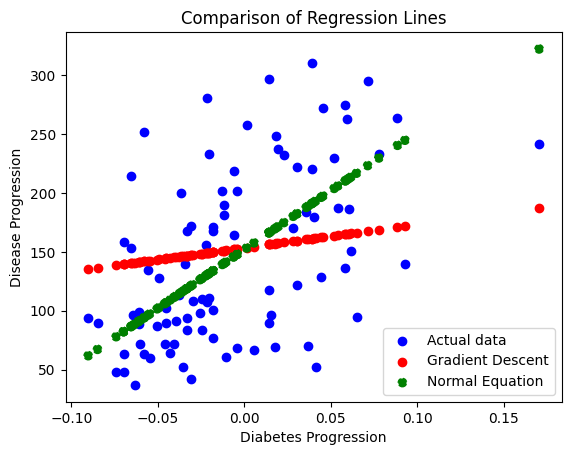

In [11]:
theta_normal = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

y_pred_ne = X_test.dot(theta_normal)

r2_ne = r2_score(y_test, y_pred_ne)
print(f"Normal Equation R^2: {r2_ne}")

plt.scatter(X_test[:, 1], y_test, color="blue", label="Actual data")
plt.scatter(X_test[:, 1], y_pred_gd, color="red", label="Gradient Descent")
plt.scatter(X_test[:, 1], y_pred_ne, color="green", linestyle="dashed", label="Normal Equation")
plt.xlabel("Diabetes Progression")
plt.ylabel("Disease Progression")
plt.title("Comparison of Regression Lines")
plt.legend()
plt.show()